<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-marketing-analysis-and-segmentation/blob/main/Dibimbing%20-%20Marketing%20Analysis%20and%20Segmentation%20-%20Part%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign Analysis 

**Project Objective**: Checking the performance of campaigns on different marketing channels among control & experiment groups and also among different age groups and investigate reasons for high performance or underperformance of channels.

**Dataset**:  Data is for 1 month (1st-31st January) & important variables are marketing channel, ad display language, user preferred language, age group, subscribing channel etc.

**Methodolgy**: In my analysis I have calculated & plotted conversion rates across channels, age groups, control/experiment group and days of the week to gauge the performance and derive insights. And after that have done A/B testing to validate the inferences/insights.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#importing data
df=pd.read_csv("marketing_campaign.csv")
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
#data types check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


### Data Cleaning: Analysing individual columns & fixing data types

**User ID**

In [6]:
id_len = df['user_id'].apply(lambda x: len(x))
id_len.unique()
#lengths are 9 or 10

array([10,  9])

In [7]:
df['user_id'].astype(str).str[0].unique()
#all ids starts with a 

array(['a'], dtype=object)

User ID data good.

**Date Served**

In [84]:
#type is obj, fixing it

df['date_served'].head()
#format is mm/dd/yy

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: date_served, dtype: datetime64[ns]

In [9]:
df['date_served']=pd.to_datetime(df['date_served'])
df['date_served'].tail()

10032   2018-01-17
10033   2018-01-17
10034   2018-01-05
10035   2018-01-17
10036   2018-01-06
Name: date_served, dtype: datetime64[ns]

**Converted and Is_retained**

In [85]:
df['converted']=df['converted'].replace(to_replace=["True","False"],value=[1,0]).astype('float64')
df['is_retained']=df['is_retained'].replace(to_replace=["True","False"], value=[1,0]).astype('float64')
#could not be converted to int due to null values

In [87]:
df['converted'].unique()

array([ 1.,  0., nan])

**Age Group**

In [11]:
df["age_group"].value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [12]:
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].value_counts()

19-24    1682
24-30    1568
0-18     1539
30-36    1355
36-45    1353
45-55    1353
55+      1187
Name: age_group, dtype: int64

**date_subscribed and date_canceled**

In [13]:
df['date_subscribed']=pd.to_datetime(df['date_subscribed'])
df['date_canceled']=pd.to_datetime(df['date_canceled'])

In [14]:
#creating day of week for subscription for future analysis
df['DOW_subscribed']=df['date_subscribed'].dt.dayofweek
df['DOW_subscribed'].value_counts()

1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: DOW_subscribed, dtype: int64

In [15]:
weekday_dict={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [16]:
df['DOW_subscribed'] = df['DOW_subscribed'].map(weekday_dict)
df['DOW_subscribed'].value_counts()

Tues    386
Wed     352
Mon     306
Thu     226
Fri     199
Sun     196
Sat     191
Name: DOW_subscribed, dtype: int64

**Marketing Channel**

In [17]:
df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

**Variant**

In [18]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

**Language**

In [19]:
df['language_displayed'].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [20]:
df['language_preferred'].value_counts()

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [21]:
#Checking if language displayed is same as languae preferred

In [22]:
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not correct for {} observations".format(df['is_language_correct'].count()-
                                                        df['is_language_correct'].sum()))

Language is not correct for 522 observations


**Data cleaning is done, reviewing the cleaned data**

In [23]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  DOW_subscribed       1856 non-null   object        
 13  is_language_correct  10037 non-

# Exploratory Data Analysis

### Daily Marketing Reach by Channel

In [25]:
print('Unique total users: {}'.format(df['user_id'].nunique()))
print("Unique users converted: {}".format(df.loc[df['converted']==1,'user_id'].nunique()))

Unique total users: 7309
Unique users converted: 1015


### Marketing Channel Analysis

In [89]:
channel_count=df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


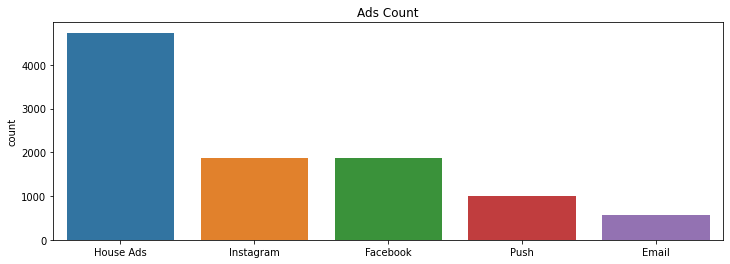

In [27]:
plt.figure(figsize=(12,4))
ax=sns.countplot(df['marketing_channel'],order=channel_count.index)
plt.xlabel("")
plt.title("Ads Count",fontsize=12);

In [28]:
#pivoting the ads count by channel

daily_ads_count=df.pivot_table(values="user_id",index="date_served", columns="marketing_channel", aggfunc=len)
daily_ads_count.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


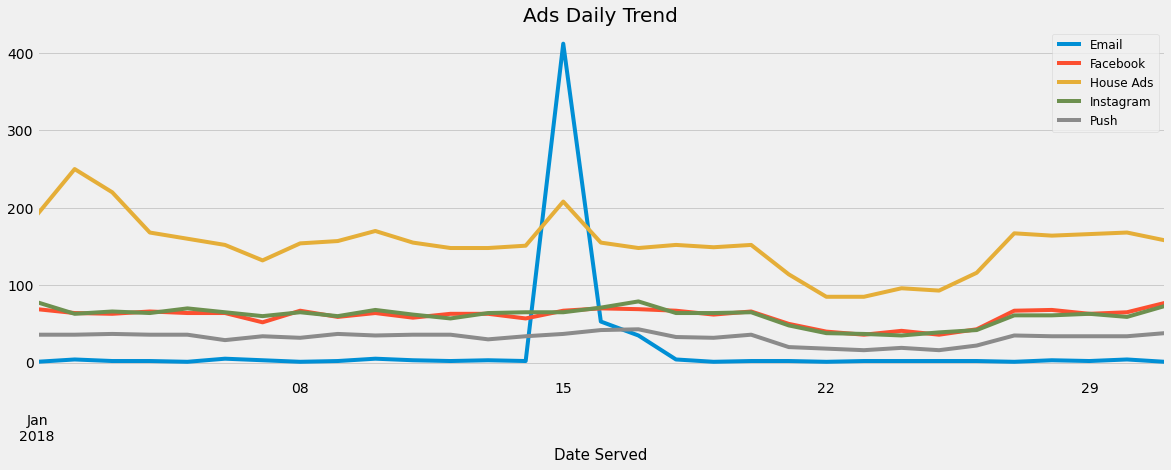

In [29]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

- There was an **Email Blast** on 15th of the month and has been negligible otherwise


- House ads are bulk of the chunk but has been fluctauting 


- Facebook, Insta and Push ads have remained flat throughout the month

In [30]:
conversions=df.groupby('marketing_channel')['converted'].sum()
ads=df.groupby('marketing_channel')['converted'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193.0,565
Facebook,237.0,1860
House Ads,298.0,4733
Instagram,265.0,1871
Push,83.0,993


In [31]:
conversion_df.columns=['conversions','ads_served']

In [32]:
conversion_df['conversion_rate']=conversion_df['conversions']/conversion_df['ads_served']
conversion_df

,conversions,ads_served,conversion_rate
marketing_channel,,,
Email,193.0,565,0.341593
Facebook,237.0,1860,0.127419
House Ads,298.0,4733,0.062962
Instagram,265.0,1871,0.141635
Push,83.0,993,0.083585


**Overall email has high conversion rate and seems like house ads which are highest of the lot has least conversion rate, so why ad allocation towards a low converting channel is hightest needs to be checked.**

### Dividing into Control & Experimemt Groups

In [33]:
conversions=df.groupby(['variant','marketing_channel'])['converted'].sum()
ads=df.groupby(['variant','marketing_channel'])['converted'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

converted  converted
variant         marketing_channel                      
control         Email                   80.0        274
                Facebook                52.0        894
                House Ads              172.0       2552
                Instagram               52.0        888
                Push                    15.0        468
personalization Email                  113.0        291
                Facebook               185.0        966
                House Ads              126.0       2181
                Instagram              213.0        983
                Push                    68.0        525

In [34]:
conversion_df.columns=['conversions','ads_served']
conversion_df['conversion_rate']=round(conversion_df['conversions']/conversion_df['ads_served'],2)
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [91]:
print(conversion_df['conversions'].sum(level=0))

print(conversion_df['ads_served'].sum(level=0))

variant
control            371.0
personalization    705.0
Name: conversions, dtype: float64
variant
control            5076
personalization    4946
Name: ads_served, dtype: int64


<ipython-input-91-3bafe036bae0>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['conversions'].sum(level=0))
<ipython-input-91-3bafe036bae0>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(conversion_df['ads_served'].sum(level=0))


**Personalization group has very high conversions compared to control group for same number of ads, Distribution of ads by channel below show both groups had more or less same number of ads per channel**

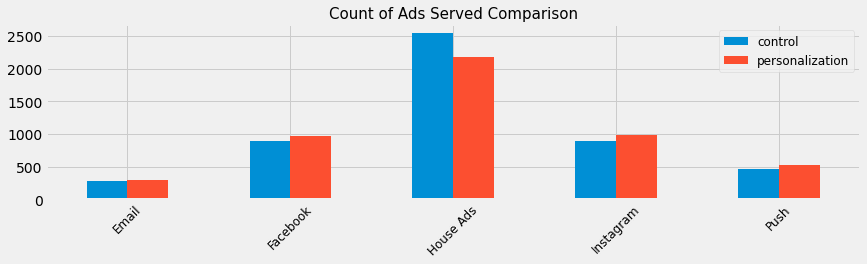

In [36]:
plt.style.use('fivethirtyeight')

conversion_df.unstack(level=0).plot(kind='bar',y='ads_served',figsize=(13,3))

plt.title("Count of Ads Served Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend(loc='upper right',fontsize=12);

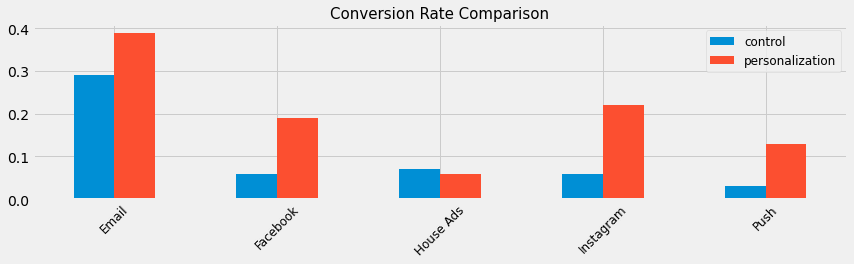

In [37]:
plt.style.use('fivethirtyeight')

conversion_df.unstack(level=0).plot(kind='bar',y='conversion_rate',figsize=(13,3))

plt.title("Conversion Rate Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend(loc='upper right',fontsize=12);

# Retention Rate

In [38]:
converted_df=df[df['converted']==1]

In [39]:
total_subs=converted_df['user_id'].nunique()
retained_subs=converted_df.loc[converted_df['is_retained']==1]['user_id'].nunique()
print("Retention Rate: {}%".format(100*round(retained_subs/total_subs,1)))

Retention Rate: 60.0%


# Conversions Analysis by Age Group

In [40]:
age_df=df.pivot_table(values='user_id',index=['marketing_channel','converted'],columns='age_group',aggfunc=len)
age_df

age_group                    0-18  19-24  24-30  30-36  36-45  45-55  55+
marketing_channel converted                                              
Email             0.0          54     59     68     47     51     50   43
                  1.0          39     52     52     13     12     15   10
Facebook          0.0         215    269    247    228    213    290  161
                  1.0          49     78     49     21     13      9   18
House Ads         0.0         636    703    623    668    558    647  600
                  1.0          58     58     58     31     31     31   31
Instagram         0.0         261    214    230    246    261    207  187
                  1.0          39    101     56     13     19     20   17
Push              0.0         170    120    160     82    190     77  111
                  1.0          16     25     23      4      3      5    7

### Conversion Function

In [41]:
def conversion_rate(df, column_names):
    # Total number of converted users
    column_conv = df[df['converted'] == 1].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = df.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = round(column_conv/column_total,2)
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [42]:
age_group_conrate = conversion_rate(df,["marketing_channel","age_group"])
age_group_conrate

marketing_channel  age_group
Email              0-18         0.41
                   19-24        0.46
                   24-30        0.45
                   30-36        0.22
                   36-45        0.19
                   45-55        0.22
                   55+          0.19
Facebook           0-18         0.17
                   19-24        0.23
                   24-30        0.17
                   30-36        0.07
                   36-45        0.06
                   45-55        0.03
                   55+          0.09
House Ads          0-18         0.10
                   19-24        0.09
                   24-30        0.10
                   30-36        0.05
                   36-45        0.06
                   45-55        0.05
                   55+          0.06
Instagram          0-18         0.13
                   19-24        0.31
                   24-30        0.19
                   30-36        0.05
                   36-45        0.06
         

In [43]:
age_group_conv_df=pd.DataFrame(age_group_conrate.unstack(level=0))
age_group_conv_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


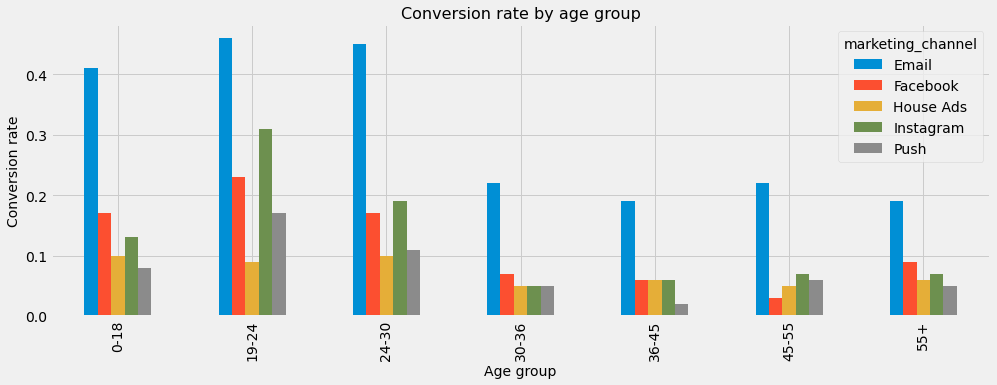

In [44]:
plt.style.use('fivethirtyeight')
age_group_conv_df.plot(kind='bar',figsize=(15,5))


plt.title('Conversion rate by age group', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14);

- Young age grouups upto 24-30 has high converion rates for across all channels compared to 30-36 & older groups

- House ads have low conversion rates even among young groups

# Conversions Analysis by Channel

In [45]:
channel_convr_df=pd.DataFrame(conversion_rate(df,['date_served','marketing_channel']).unstack(level=1))
channel_convr_df.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


In [46]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        
        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()
        plt.clf();

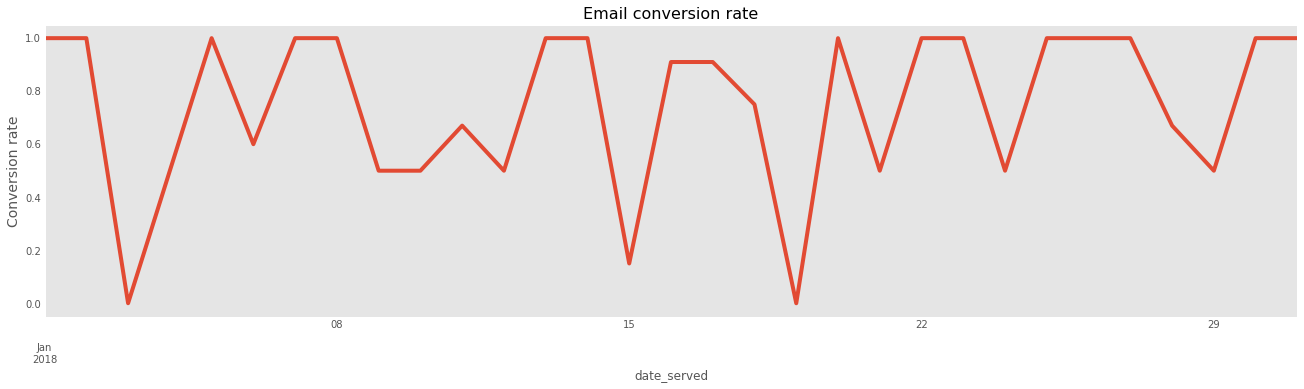

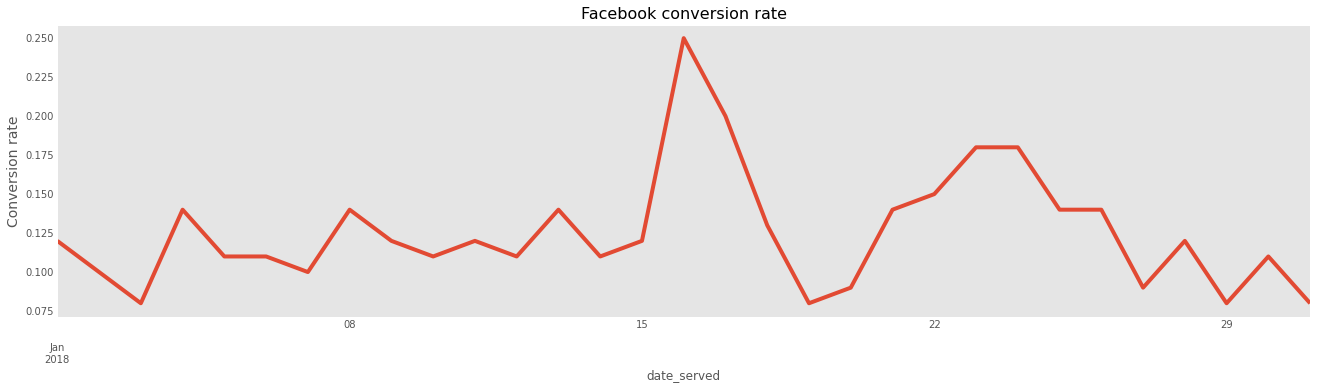

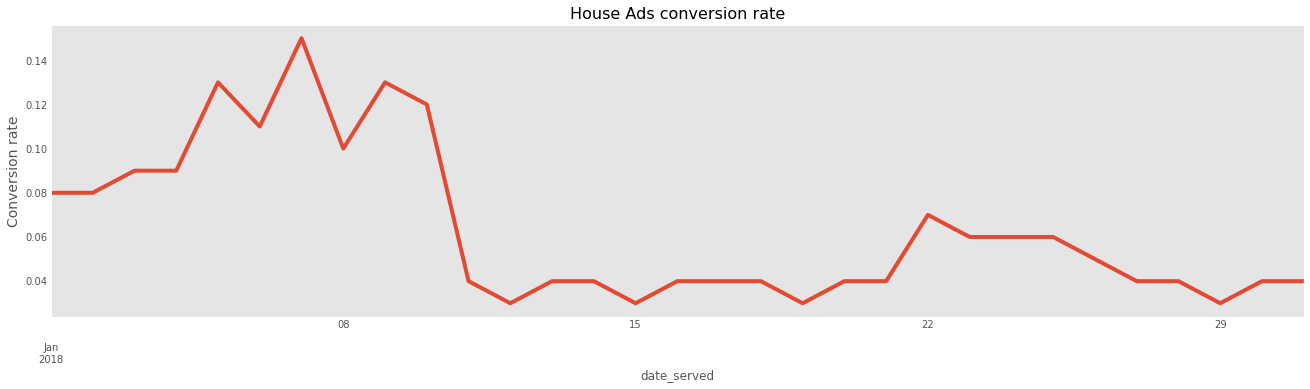

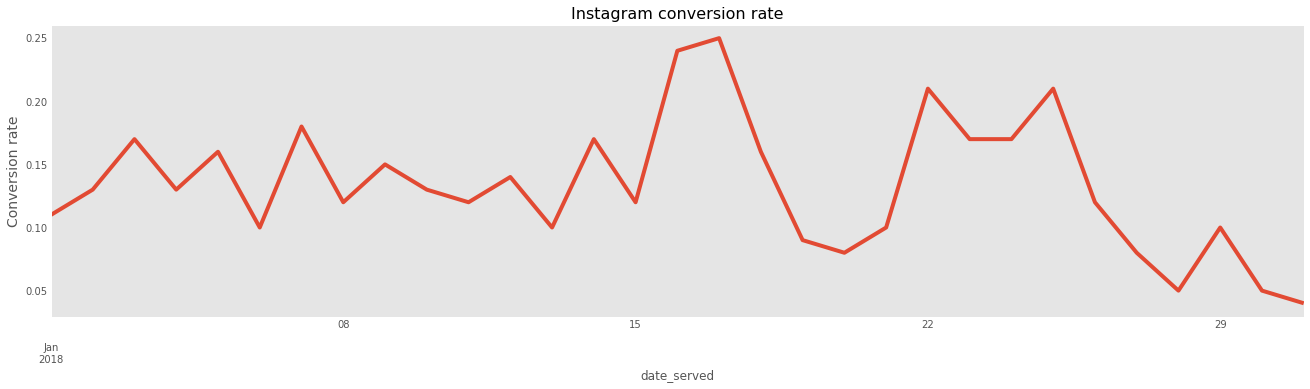

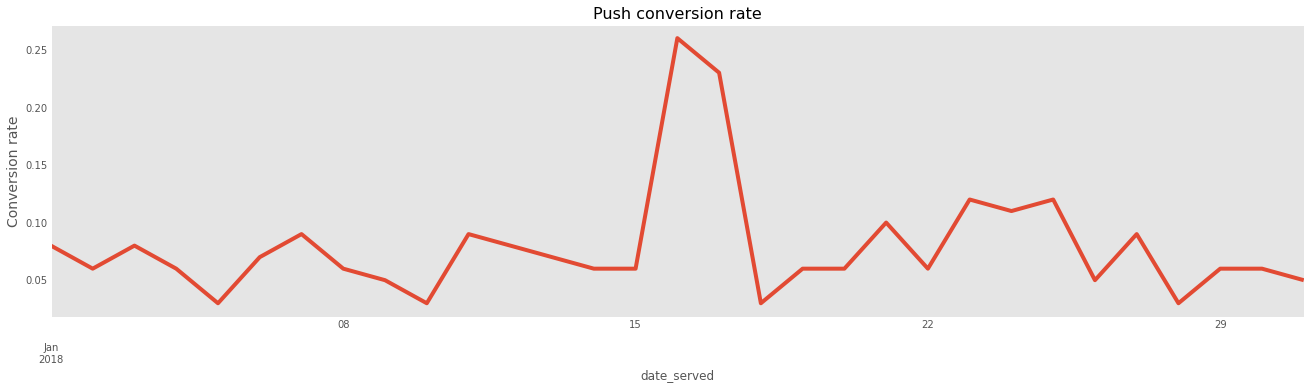

<Figure size 432x288 with 0 Axes>

In [47]:
plotting_conv(channel_convr_df,"line");

- All channels excep house ads have high daily fluctuations in coversion rates


- **House ads conversions have gone down drastically after 10th, needs to be investigated**

# Plotting Conversion rates by Age

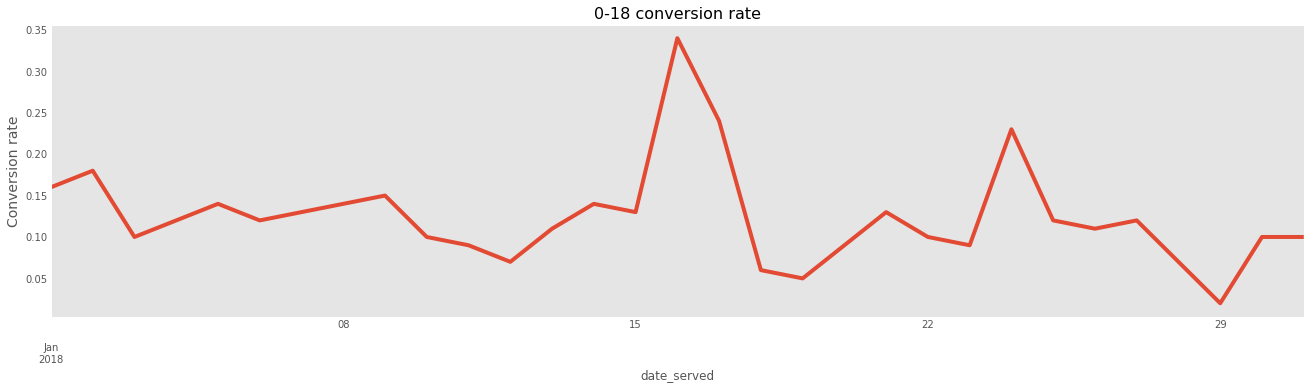

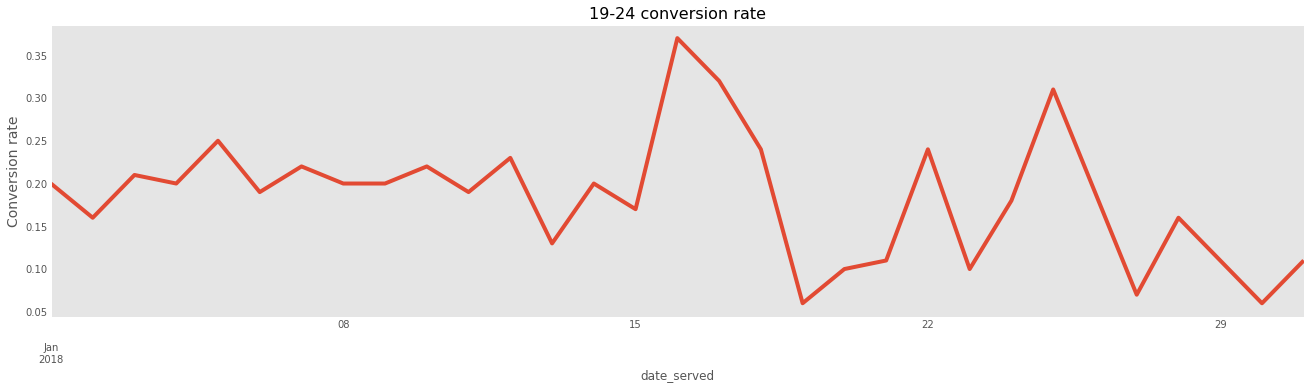

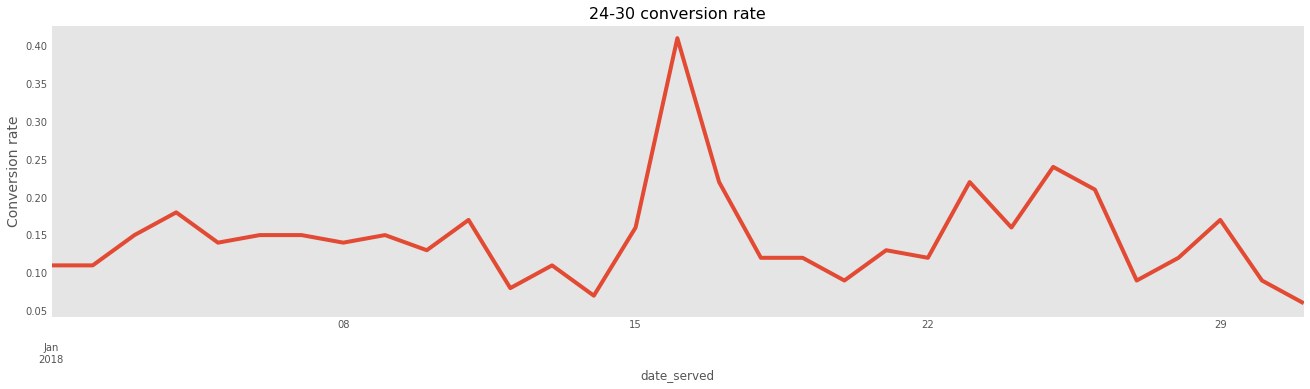

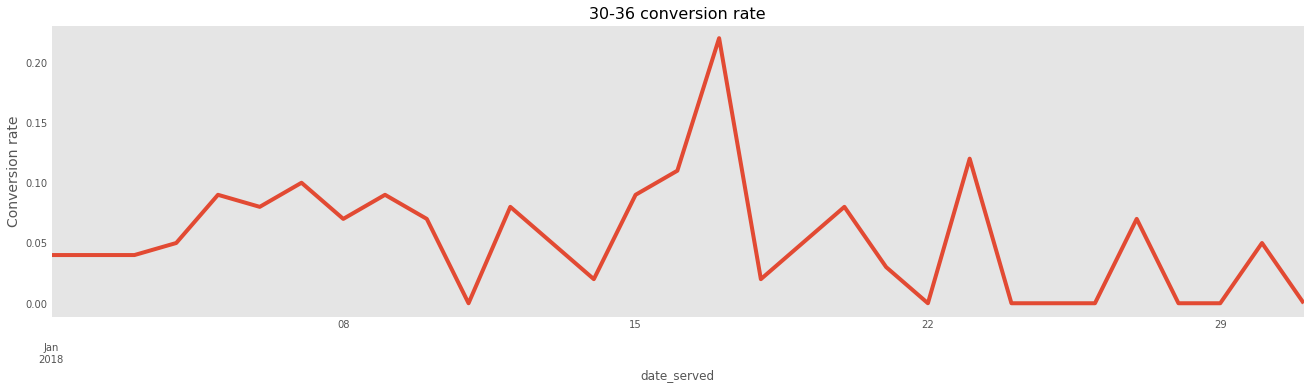

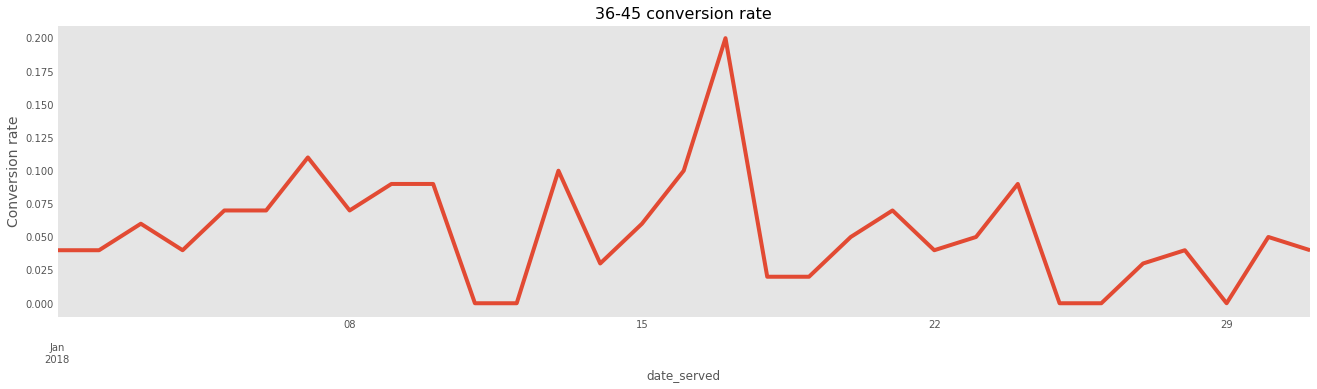

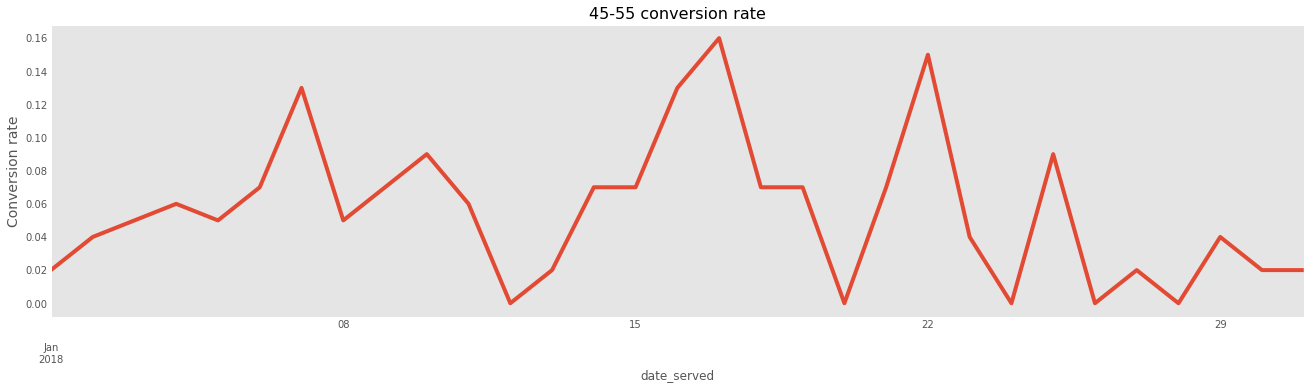

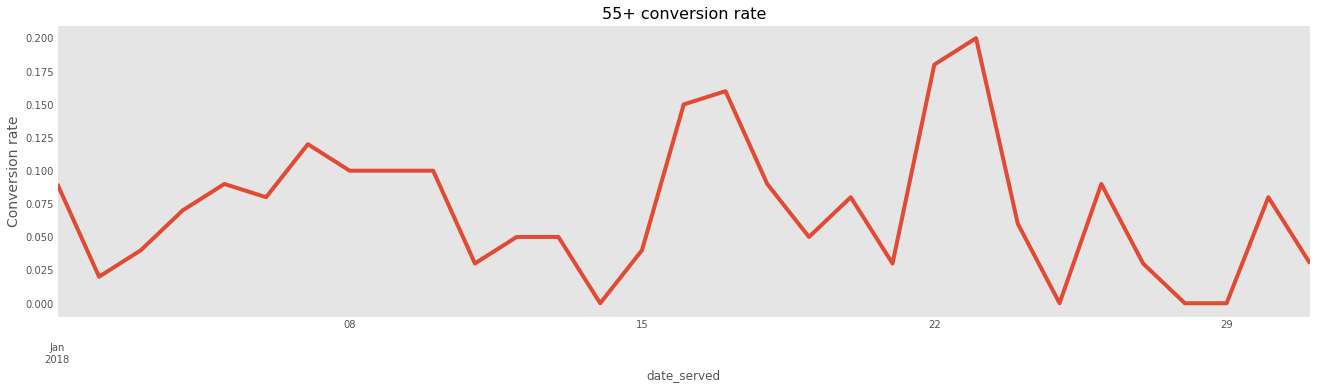

<Figure size 432x288 with 0 Axes>

In [48]:
age_group_conv_df=pd.DataFrame(conversion_rate(df,['date_served','age_group']).unstack(level=1))
plotting_conv(age_group_conv_df,"line")

- Each age group has spike in conversion around 16th 


- This is driven by FB, Insta and Push Ads as these channels had spike at the same time

# Day of week

In [49]:
df['DOW_served']=df['date_served'].dt.dayofweek

In [50]:
DOW_conversion_df = pd.DataFrame(conversion_rate(df,['DOW_served','marketing_channel']).unstack(level=1))
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
0.0,0.16,0.12,0.06,0.12,0.06
1.0,0.91,0.15,0.07,0.15,0.12
2.0,0.84,0.13,0.08,0.15,0.11
3.0,0.73,0.13,0.06,0.14,0.07
4.0,0.67,0.11,0.06,0.13,0.06
5.0,0.82,0.11,0.06,0.09,0.07
6.0,0.75,0.12,0.07,0.13,0.07


In [51]:
map_dict = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri',5.0: 'Sat',6.0: 'Sun'}
DOW_conversion_df['day'] = DOW_conversion_df.index.map(map_dict)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push,day
DOW_served,,,,,,
0.0,0.16,0.12,0.06,0.12,0.06,Mon
1.0,0.91,0.15,0.07,0.15,0.12,Tue
2.0,0.84,0.13,0.08,0.15,0.11,Wed
3.0,0.73,0.13,0.06,0.14,0.07,Thu
4.0,0.67,0.11,0.06,0.13,0.06,Fri
5.0,0.82,0.11,0.06,0.09,0.07,Sat
6.0,0.75,0.12,0.07,0.13,0.07,Sun


In [52]:
DOW_conversion_df.set_index(DOW_conversion_df['day'],inplace=True)

In [53]:
DOW_conversion_df.drop(columns='day',inplace=True)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
day,,,,,
Mon,0.16,0.12,0.06,0.12,0.06
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11
Thu,0.73,0.13,0.06,0.14,0.07
Fri,0.67,0.11,0.06,0.13,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07


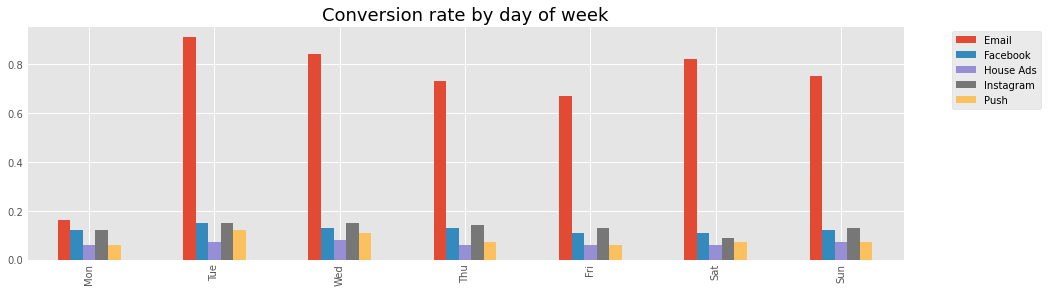

In [54]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

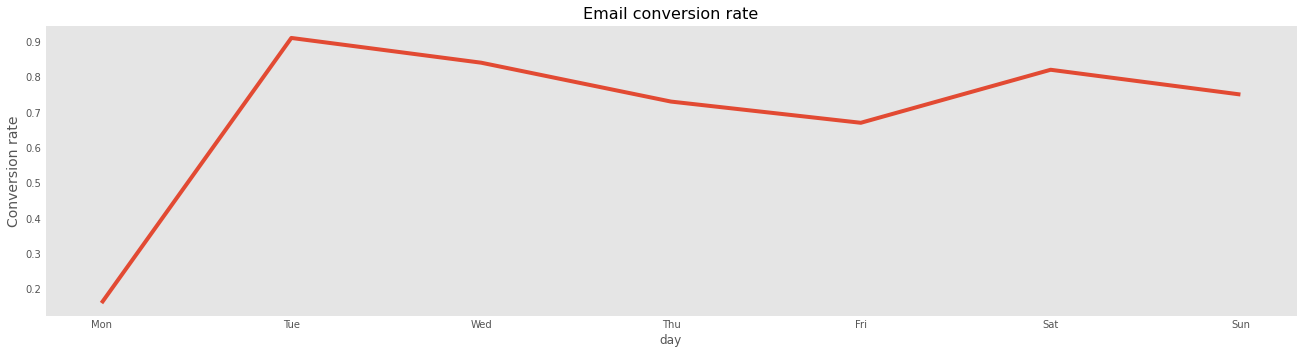

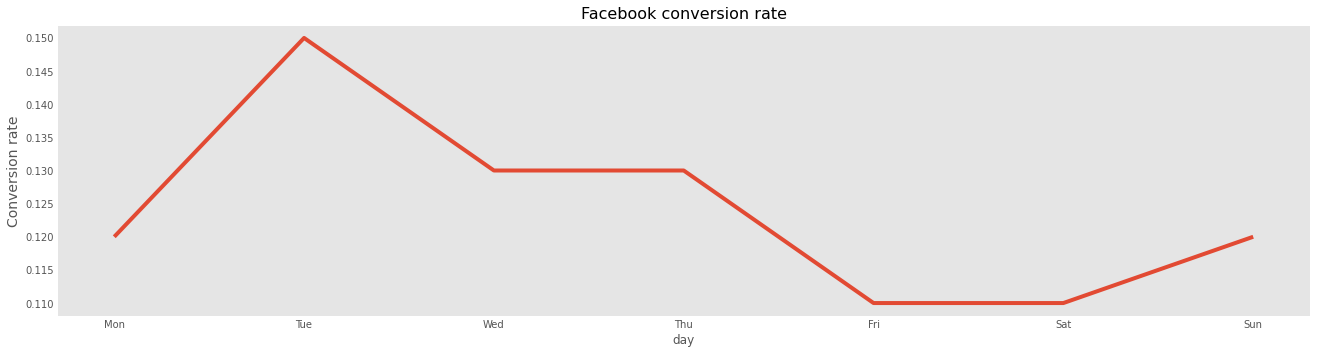

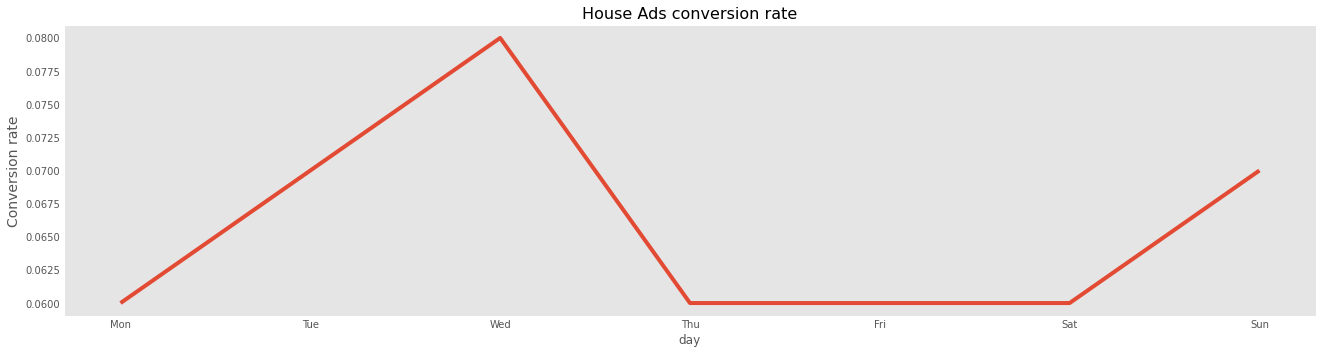

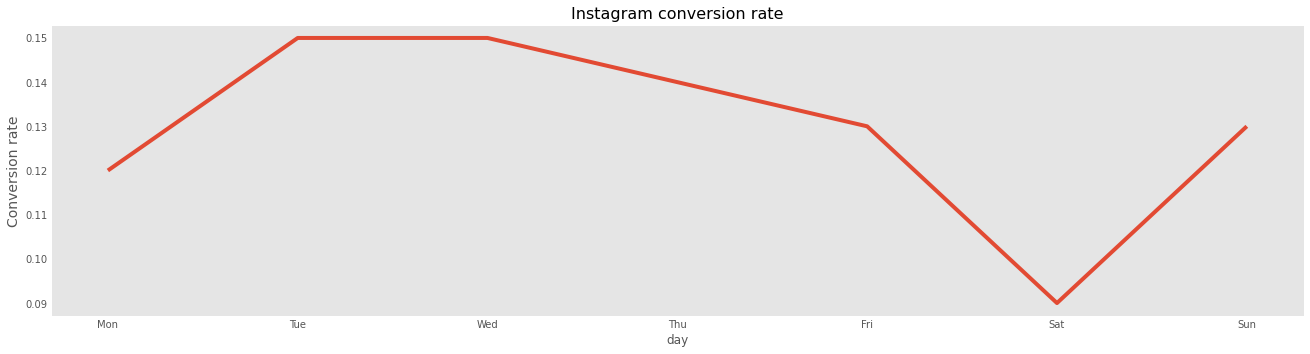

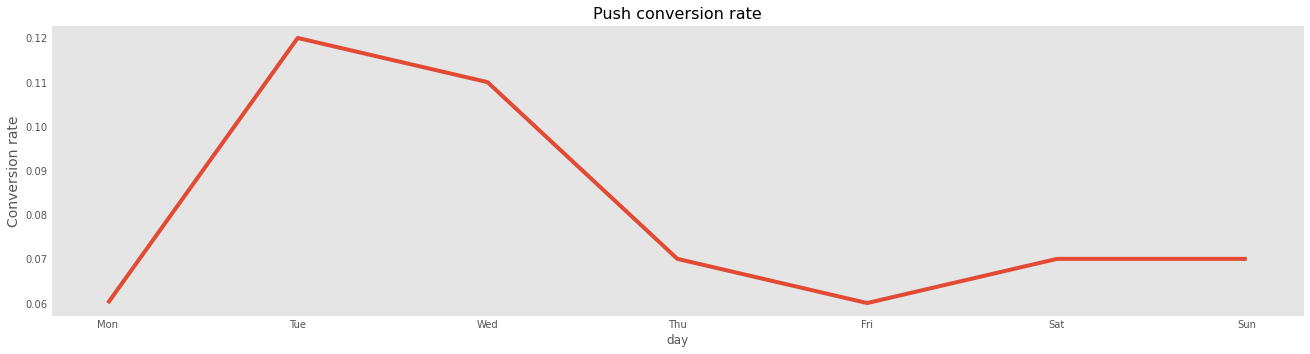

<Figure size 432x288 with 0 Axes>

In [55]:
plotting_conv(DOW_conversion_df,"line");

**House ads conversion rate**

The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

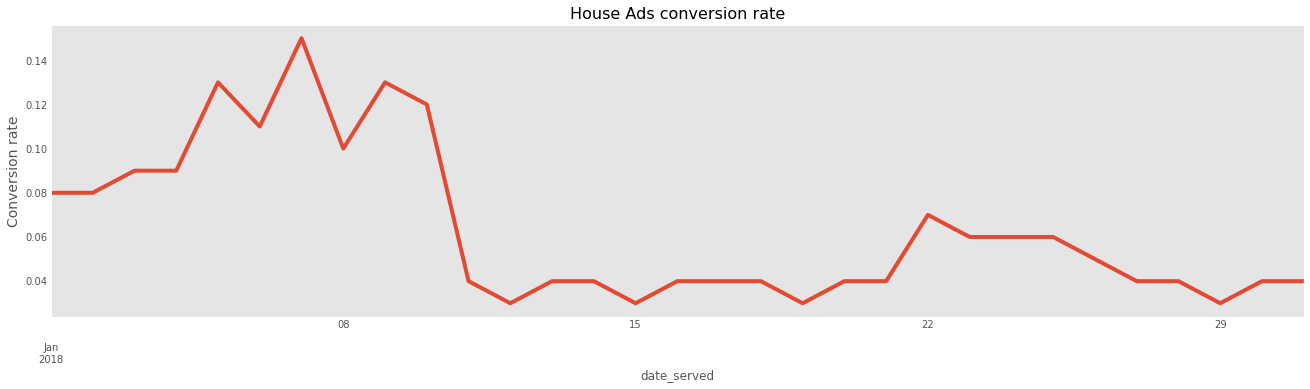

<Figure size 432x288 with 0 Axes>

In [56]:
plotting_conv(pd.DataFrame(channel_convr_df['House Ads']),"line")

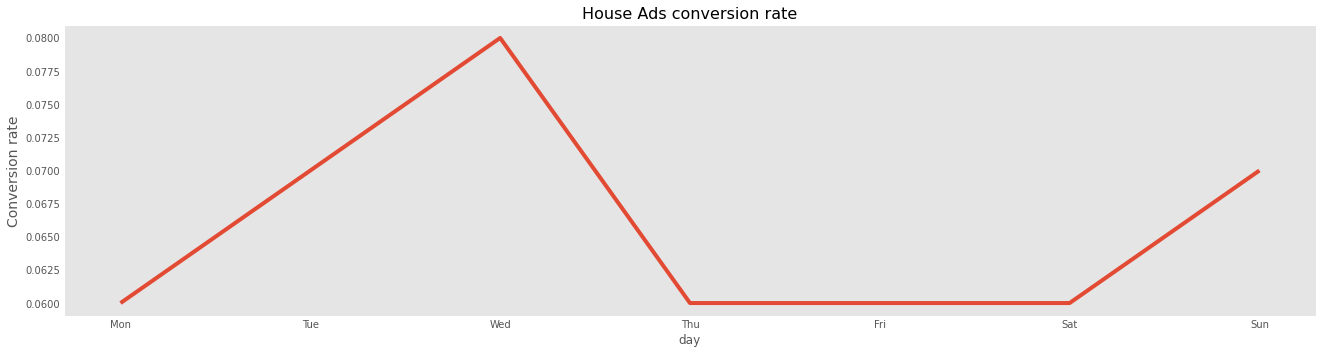

<Figure size 432x288 with 0 Axes>

In [57]:
plotting_conv(pd.DataFrame(DOW_conversion_df['House Ads']),"line")

**Analysing House ads conversion rate**

House ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

It's vital to identify if the fluctuations are due to shifts in user behavior (i.e., differences across the day of the week or time of the month) versus a some problem in technical implementation or marketing strategy.

In [58]:
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [59]:
idx = pd.IndexSlice
conversion_df.loc[idx[:,'House Ads'],:]

,,conversions,ads_served,conversion_rate
variant,marketing_channel,,,
control,House Ads,172.0,2552,0.07
personalization,House Ads,126.0,2181,0.06


Both control & exp group have approx same low conversions rate

**Weekday vs Weekend House Ads Conversion**

In [60]:
house_ads_df = pd.DataFrame(channel_convr_df["House Ads"])
house_ads_df.reset_index(inplace=True)
house_ads_df['DOW']=house_ads_df['date_served'].dt.dayofweek
house_ads_df.head()

,date_served,House Ads,DOW
0,2018-01-01,0.08,0
1,2018-01-02,0.08,1
2,2018-01-03,0.09,2
3,2018-01-04,0.09,3
4,2018-01-05,0.13,4


In [61]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: "Weekday" if x<=4 else "Weekend")
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,0,Weekday
1,2018-01-02,0.08,1,Weekday
2,2018-01-03,0.09,2,Weekday
3,2018-01-04,0.09,3,Weekday
4,2018-01-05,0.13,4,Weekday


In [62]:
print("Conversion rates for House Ads")
print(house_ads_df.groupby("day type")["House Ads"].mean())

Conversion rates for House Ads
day type
Weekday    0.064348
Weekend    0.062500
Name: House Ads, dtype: float64


No real difference in weekday vs weekend house ads conv rates

###  House ads conversion by language

Now that its clear that there are no natural fluctuations across the day of the week lets check if language was correctly shown as per the target user preferences.

Perhaps the new marketing campaign does not apply broadly across different cultures.

In [63]:
house_ads_df=df[df['marketing_channel']=='House Ads']
print("Total house ads: {}".format(len(house_ads_df)))
print("House ads with wrong language: {}".format(sum(house_ads_df['language_displayed'] != house_ads_df['language_preferred'])))
print("House ads with correct language: {}".format(sum(house_ads_df['language_displayed'] == house_ads_df['language_preferred'])))
print("House ads conversions: {}".format(house_ads_df['converted'].sum()))

Total house ads: 4733
House ads with wrong language: 453
House ads with correct language: 4280
House ads conversions: 298.0


In [64]:
house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)
house_ads_df.head()

<ipython-input-64-4cda224ce30f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct,DOW_served
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0


In [65]:
house_ads_lang_df=house_ads_df.groupby(['date_served','is_language_correct'])['user_id'].count().unstack(level=1)
house_ads_lang_df.fillna(0,inplace=True)
house_ads_lang_df['Correct %'] = 100*house_ads_lang_df['Yes']/(house_ads_lang_df['No'] + house_ads_lang_df['Yes'])
house_ads_lang_df.round()

is_language_correct,No,Yes,Correct %
date_served,,,
2018-01-01,2.0,189.0,99.0
2018-01-02,3.0,247.0,99.0
2018-01-03,0.0,220.0,100.0
2018-01-04,0.0,168.0,100.0
2018-01-05,0.0,160.0,100.0
2018-01-06,1.0,151.0,99.0
2018-01-07,2.0,130.0,98.0
2018-01-08,0.0,154.0,100.0
2018-01-09,0.0,157.0,100.0


Setting up conversion indexes

its clear that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

Bug occured on 11th, so conv rate from 1st to 10th should be considered

In [66]:
house_ads_no_bug = house_ads_df[house_ads_df['date_served']<"2018-01-11"]
conv_rates = conversion_rate(house_ads_no_bug,['language_preferred'])
conv_rates_df = pd.DataFrame(conv_rates)
conv_rates_df.reset_index(inplace=True)
conv_rates_df.columns=['Language','Conversion_rate']
conv_rates_df


house_ads_no_bug.groupby('language_preferred')['converted'].sum()

language_preferred
Arabic       7.0
English    142.0
German      12.0
Spanish     17.0
Name: converted, dtype: float64

In [67]:
house_ads_no_bug.groupby('language_preferred')['converted'].count()

language_preferred
Arabic       14
English    1592
German       31
Spanish     117
Name: converted, dtype: int64

In [68]:
#finding if languae was correct what would have been conv rate
house_ads_lang_counts=pd.DataFrame(house_ads_df.groupby('language_preferred')['user_id'].count())
house_ads_lang_counts.reset_index(inplace=True)
house_ads_lang_counts.columns=['Language','Ad_Count']
house_ads_lang_counts

,Language,Ad_Count
0,Arabic,107
1,English,4112
2,German,112
3,Spanish,402


In [69]:
house_ads_lang_counts['Expected_Conversion_Count']=house_ads_lang_counts['Ad_Count']*conv_rates_df['Conversion_rate']
house_ads_lang_counts

,Language,Ad_Count,Expected_Conversion_Count
0,Arabic,107,53.50
1,English,4112,411.20
2,German,112,49.28
3,Spanish,402,64.32


In [70]:
print("Without bug house ads would have converted: {}".format(house_ads_lang_counts['Expected_Conversion_Count'].sum().round()))

Without bug house ads would have converted: 578.0


house_ads_no_bug.language_preferred.value_counts()

In [71]:
len(house_ads_no_bug.loc[(house_ads_no_bug['language_preferred']=='English') & house_ads_no_bug['converted']==1])

142

# A/B Testing

Test allocation

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

In [72]:
email_df = df[df['marketing_channel']== "Email"]

In [73]:
email_df['variant'].value_counts()

personalization    291
control            274
Name: variant, dtype: int64

Comparing conversion rates

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

In [74]:
subscribers = email_df.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

In [75]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Creating a lift function**

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:


**Treatment conversion rate - Control conversion rate**

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

Calculate the mean of a and b using np.mean().

Use a_mean and b_mean to calculate the lift of the treatment.

Print the results of the lift() function you created using the control and personalization variables.

In [76]:
lift = (np.mean(personalization) - np.mean(control))/np.mean(control)
print("Lift is {}%".format(round(lift*100)))

Lift is 39%


**Is the lift stat significant?**

In [77]:
from scipy import stats

In [78]:
##A two sample T-test is used to compare the means of two separate samples.

stats.ttest_ind(control,personalization)

Ttest_indResult(statistic=-2.7343299447505065, pvalue=0.00645148784469419)

##### Creating a sub sgement function for hypothesis testiung

In [79]:
def ab_segmentation(channel,subsegment=None):
    
    if subsegment is None:
        
        subsegmented_df=df[df['marketing_channel']==channel]
    
        subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
        subscribers_df=pd.DataFrame(subscribers.unstack(level=1))
    
        control= subscribers_df['control'].dropna()
    
        personalization= subscribers_df['personalization'].dropna()
    
        lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
        print("lift: {}%".format(round(lift*100)))
    
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
        
    else:
        
        for value in np.unique(df[subsegment].values):
            
            print(value)
  
            subsegmented_df=df[ (df['marketing_channel']==channel) & (df[subsegment]==value) ]
    
            subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
            subscribers_df = pd.DataFrame(subscribers.unstack(level=1))
    
            control= subscribers_df['control'].dropna()
    
            personalization= subscribers_df['personalization'].dropna()
    
            lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
            print("lift: {}%".format(round(lift*100)))
            
            print("Count of control & personlization: {} & {}".format(len(control),len(personalization)))
            
            print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [80]:
ab_segmentation("Email")

lift: 39%
t-statistic: Ttest_indResult(statistic=-2.7343299447505065, pvalue=0.00645148784469419) 




In [81]:
ab_segmentation("Email","language_displayed")

Arabic
lift: 50%
Count of control & personlization: 5 & 5
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39%
Count of control & personlization: 240 & 248
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -2%
Count of control & personlization: 17 & 27
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 167%
Count of control & personlization: 8 & 4
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [82]:
ab_segmentation("Instagram")

lift: 380%
t-statistic: Ttest_indResult(statistic=-10.749635585136122, pvalue=3.6595188397777727e-26) 




In [83]:
ab_segmentation("Instagram","age_group")

0-18
lift: 532%
Count of control & personlization: 125 & 168
t-statistic: Ttest_indResult(statistic=-4.420030279559059, pvalue=1.3945853816242439e-05) 


19-24
lift: 1007%
Count of control & personlization: 115 & 187
t-statistic: Ttest_indResult(statistic=-8.919549191849601, pvalue=4.71470086122104e-17) 


24-30
lift: 542%
Count of control & personlization: 125 & 146
t-statistic: Ttest_indResult(statistic=-5.770186139845332, pvalue=2.174138604598001e-08) 


30-36
lift: 171%
Count of control & personlization: 145 & 107
t-statistic: Ttest_indResult(statistic=-1.741921733197327, pvalue=0.08275202630134179) 


36-45
lift: 145%
Count of control & personlization: 160 & 109
t-statistic: Ttest_indResult(statistic=-1.8514991272922312, pvalue=0.06520183209266825) 


45-55
lift: 21%
Count of control & personlization: 114 & 106
t-statistic: Ttest_indResult(statistic=-0.4071322043730024, pvalue=0.6843103638809036) 


55+
lift: -39%
Count of control & personlization: 63 & 137
t-statistic: Ttest_indR